# Libraries and import

In [ ]:
# Import the necessary libraries
from google.colab import drive
import pandas as pd

# Mount the Google Drive to access files stored in it
drive.mount('/content/drive')

# Import additional required libraries
import json
import numpy as np

# Install the transformers and torch libraries using pip
!pip install transformers torch

# Data

In [4]:
# Define the file path where the JSON data is stored
file_path = '/content/drive/MyDrive/Vanderbilt Graduate Master/DSI 2024: Spring Semester/NLP/News_Category_Dataset_v3.json'

# Load and parse the JSON data
with open(file_path, 'r') as file:
    # Read the file content
    file_content = file.read()

    # Try to parse it as a JSON array
    try:
        data = json.loads(file_content)
    except json.JSONDecodeError as e:
        # Handle files with multiple JSON objects by splitting correctly
        # This part is just an example and should be adapted to your specific file structure
        data = [json.loads(obj) for obj in file_content.split('\n') if obj.strip()]

# Convert the list of dictionaries to a DataFrame
data = pd.DataFrame(data)

# Filter the DataFrame to include only categories 'TECH', 'SPORTS', and 'U.S. NEWS'
data

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [5]:
# Selects specific columns ('headline', 'category', and 'short_description') from the DataFrame 'data',
# and updates 'data' to only include these columns.
data = data[['headline', 'category', 'short_description']]

# Concatenates the 'headline' and 'short_description' columns in the DataFrame 'data' with a space in between.
# The resulting concatenated string is then stored in a new column named 'text'.
data['text'] = data['headline'] + " " + data['short_description']

# Updates the DataFrame 'data' to keep only the 'category' and 'text' columns,
# effectively discarding the other columns.
data = data[['category', 'text']]

# Displays the current state of the DataFrame 'data',
# which now consists of two columns: 'category' and 'text'.
data

<ipython-input-5-423a9a203e22>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['headline'] + " " + data['short_description']


,category,text
0,U.S. NEWS,Over 4 Million Americans Roll Up Sleeves For O...
1,U.S. NEWS,"American Airlines Flyer Charged, Banned For Li..."
2,COMEDY,23 Of The Funniest Tweets About Cats And Dogs ...
3,PARENTING,The Funniest Tweets From Parents This Week (Se...
4,U.S. NEWS,Woman Who Called Cops On Black Bird-Watcher Lo...
...,...,...
209522,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
209523,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...
209524,SPORTS,"Giants Over Patriots, Jets Over Colts Among M..."
209525,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...


In [6]:
# Modify the 'category' column
data['category'] = np.where(data['category'] == 'TECH', 'TECH', 'NOT_TECH')
data

,category,text
0,NOT_TECH,Over 4 Million Americans Roll Up Sleeves For O...
1,NOT_TECH,"American Airlines Flyer Charged, Banned For Li..."
2,NOT_TECH,23 Of The Funniest Tweets About Cats And Dogs ...
3,NOT_TECH,The Funniest Tweets From Parents This Week (Se...
4,NOT_TECH,Woman Who Called Cops On Black Bird-Watcher Lo...
...,...,...
209522,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
209523,NOT_TECH,Maria Sharapova Stunned By Victoria Azarenka I...
209524,NOT_TECH,"Giants Over Patriots, Jets Over Colts Among M..."
209525,NOT_TECH,Aldon Smith Arrested: 49ers Linebacker Busted ...


# NLP with spaCy

In [7]:
# Imports the 'spacy' library, a powerful and flexible toolkit for working with Natural Language Processing (NLP).
import spacy

# Imports 'spacy.cli', which provides access to spaCy's command line interface functionalities,
# enabling operations like downloading language models directly via code.
import spacy.cli

# Downloads the 'en_core_web_lg' language model using spaCy's command line interface.
spacy.cli.download("en_core_web_lg")

# Loads the 'en_core_web_lg' model into 'nlp', creating an NLP processing pipeline.
nlp = spacy.load("en_core_web_lg")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Remove Stop words and Punctuation into clean_text to get more useful keywords

In [9]:
def clean_text_spacy(text):
    # Process the text using the SpaCy pipeline
    doc = nlp(text)

    # Tokenize the document, remove stopwords and punctuation, and filter non-alpha characters
    filtered_tokens = [token.text for token in doc if token.is_alpha and not token.is_stop and not token.is_punct]

    # Join the filtered tokens back into a single string
    return ' '.join(filtered_tokens)


data['cleaned_text'] = data['text'].apply(clean_text_spacy)
data

,category,text,cleaned_text
0,NOT_TECH,Over 4 Million Americans Roll Up Sleeves For O...,Million Americans Roll Sleeves Omicron Targete...
1,NOT_TECH,"American Airlines Flyer Charged, Banned For Li...",American Airlines Flyer Charged Banned Life Pu...
2,NOT_TECH,23 Of The Funniest Tweets About Cats And Dogs ...,Funniest Tweets Cats Dogs Week dog understand ...
3,NOT_TECH,The Funniest Tweets From Parents This Week (Se...,Funniest Tweets Parents Week Accidentally grow...
4,NOT_TECH,Woman Who Called Cops On Black Bird-Watcher Lo...,Woman Called Cops Black Bird Watcher Loses Law...
...,...,...,...
209522,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,RIM CEO Thorsten Heins Significant Plans Black...
209523,NOT_TECH,Maria Sharapova Stunned By Victoria Azarenka I...,Maria Sharapova Stunned Victoria Azarenka Aust...
209524,NOT_TECH,"Giants Over Patriots, Jets Over Colts Among M...",Giants Patriots Jets Colts Improbable Super Bo...
209525,NOT_TECH,Aldon Smith Arrested: 49ers Linebacker Busted ...,Aldon Smith Arrested Linebacker Busted DUI COR...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import string
# Define additional stopwords
additional_stopwords = {'the', 'in', 'to', 'for', 'with', 'on', 'at', 'from',
                        'by', 'and', 'but', 'or', 'so', 'yet', 'nor', 'your'}

# Add additional stopwords to SpaCy's default stop list
for word in additional_stopwords:
    nlp.vocab[word].is_stop = True

def spacy_tokenize(doc):
    # Tokenize and filter using SpaCy
    return [token.text.lower() for token in nlp(doc) if token.is_alpha and not token.is_stop]

# Convert the 'cleaned_text' column of the DataFrame into a list of documents
docs = data['cleaned_text'].tolist()

# Initialize the TF-IDF Vectorizer with the SpaCy tokenizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=spacy_tokenize, token_pattern=None,
                                   lowercase=False)  # No need to set lowercase as tokens are already lowered in tokenizer

# Fit the vectorizer to the documents and transform the documents into a TF-IDF-weighted term-document matrix
X = tfidf_vectorizer.fit_transform(docs)

# Convert the term-document matrix into a DataFrame for better readability
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Printing the shape of the DataFrame and displaying the first few rows
print(f'Dataframe Shape: {tfidf_df.shape}')
print(tfidf_df.head())

Dataframe Shape: (209527, 85408)
    aa  aaa  aaaaaaaaaaaaaaahhhhhh  aaaaaah  aaaargh  aaand  aaas  aadhaar  \
0  0.0  0.0                    0.0      0.0      0.0    0.0   0.0      0.0   
1  0.0  0.0                    0.0      0.0      0.0    0.0   0.0      0.0   
2  0.0  0.0                    0.0      0.0      0.0    0.0   0.0      0.0   
3  0.0  0.0                    0.0      0.0      0.0    0.0   0.0      0.0   
4  0.0  0.0                    0.0      0.0      0.0    0.0   0.0      0.0   

   aafa  aah  ...  семья  финансирования  харьковского  ᵒᴥᵒᶅ    ᶘ    象  ﬁnd  \
0   0.0  0.0  ...    0.0             0.0           0.0   0.0  0.0  0.0  0.0   
1   0.0  0.0  ...    0.0             0.0           0.0   0.0  0.0  0.0  0.0   
2   0.0  0.0  ...    0.0             0.0           0.0   0.0  0.0  0.0  0.0   
3   0.0  0.0  ...    0.0             0.0           0.0   0.0  0.0  0.0  0.0   
4   0.0  0.0  ...    0.0             0.0           0.0   0.0  0.0  0.0  0.0   

   ﬁrst   ﬁx  ﬂavors  


# train test split sklearn

In [12]:
# Importing necessary libraries and modules for data handling, machine learning, and visualization.
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Separating features and target labels.
X = data['cleaned_text']  # Text data to be used as features for classification.
y = data['category']      # Corresponding labels or categories for the text data.

# Splitting the dataset into training and testing sets.
# A fixed random seed ensures reproducibility of the split.
seed = 77
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Initializing a TF-IDF Vectorizer to convert text data into a format suitable for machine learning.
vectorizer = TfidfVectorizer()

# Applying the vectorizer to the training data and transforming the text data into TF-IDF vectors.
# 'fit_transform' learns the vocabulary and inverse document frequency weightings, and transforms the data.
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transforming the testing data into TF-IDF vectors.
# Only 'transform' is used here, as we apply the same transformation learned from the training data.
X_test_tfidf = vectorizer.transform(X_test)


# Random forest Fitting the model

<ipython-input-13-ca7974b29b70>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_binary_df.head(10), palette='viridis')


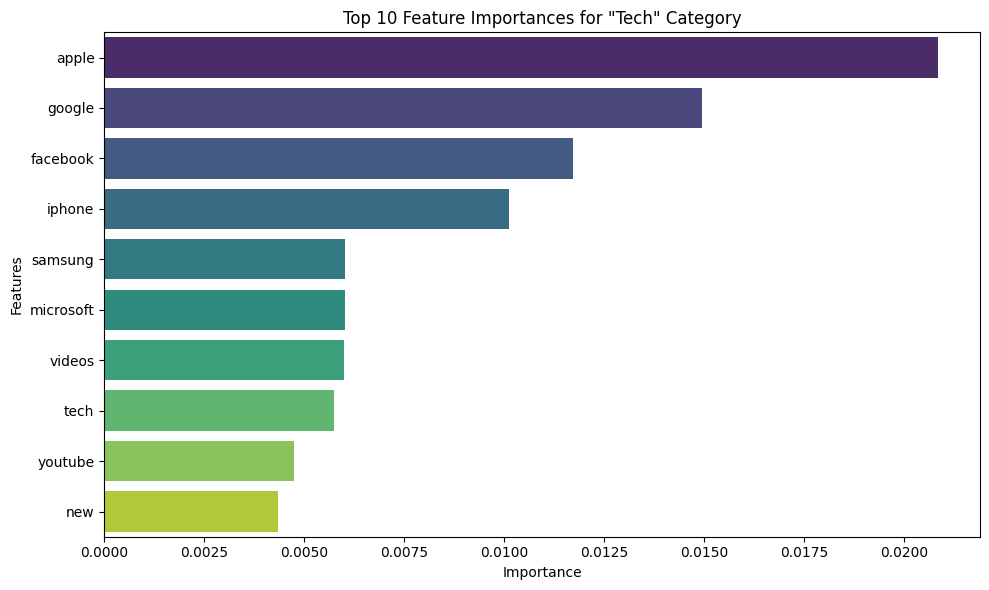

In [13]:
# Importing necessary libraries for machine learning and data preprocessing.
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Using LabelBinarizer to convert the 'category' labels into a binary format.
# This process is focused on distinguishing one specific category ('tech') from all others.
binarizer = LabelBinarizer()
y_binarized = binarizer.fit_transform(data['category']).flatten()

# Reassigning 'y_binarized' to specifically target the 'TECH' category.
# The expression '(y == 'TECH')' creates a boolean array, which is then converted to integers (1 for 'TECH', 0 for others).
y_binarized = (y == 'TECH').astype(int)

# Splitting the dataset into training and testing sets for the binary classification task.
# The random_state parameter is set to ensure reproducibility of the split.
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binarized, test_size=0.2, random_state=seed)

# Vectorizing the text data with TF-IDF transformation for the training and testing sets.
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initializing and training the RandomForestClassifier for the binary classification task.
rf_classifier_binary = RandomForestClassifier(random_state=seed)
rf_classifier_binary.fit(X_train_tfidf, y_train_binary)

# Extracting feature importances from the trained RandomForestClassifier.
feature_importances_binary = rf_classifier_binary.feature_importances_

# Creating a DataFrame to display features and their respective importances.
feature_names = vectorizer.get_feature_names_out()
feature_importance_binary_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_binary
}).sort_values(by='Importance', ascending=False)

# Visualizing the top 10 most important features in a bar chart.
# This chart helps in understanding which features are most influential in classifying the 'tech' category.
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_binary_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances for "Tech" Category')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


              precision    recall  f1-score   support

    NOT_TECH       0.99      1.00      1.00     41499
        TECH       0.82      0.08      0.14       407

    accuracy                           0.99     41906
   macro avg       0.91      0.54      0.57     41906
weighted avg       0.99      0.99      0.99     41906



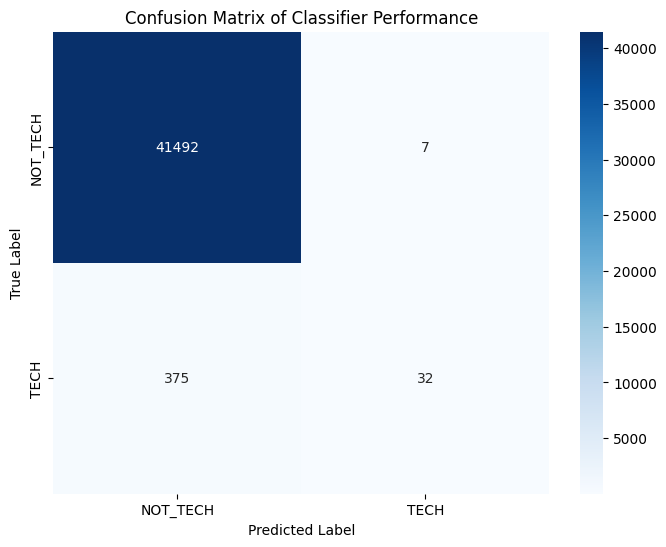

In [14]:
# Import necessary libraries for modeling and visualization.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initializing and training the RandomForestClassifier.
# 'random_state' is set for reproducibility of the model results.
rf_classifier = RandomForestClassifier(random_state=seed)
rf_classifier.fit(X_train_tfidf, y_train)

# Using the trained model to predict the categories of the test set.
y_pred = rf_classifier.predict(X_test_tfidf)

# Generating and printing a classification report.
# This report includes key metrics like precision, recall, and f1-score for each class.
print(classification_report(y_test, y_pred))

# Calculating the confusion matrix to evaluate the accuracy of the classification.
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix using a heatmap.
# This provides an intuitive display of the performance of the classifier,
# showing how many predictions fall into each category.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=binarizer.classes_, yticklabels=binarizer.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Classifier Performance')
plt.show()


# Logistic Regression

In [15]:
# Importing necessary libraries for machine learning.
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Initializing a Logistic Regression model.
# This model is chosen for its ability to provide insights into the importance of each feature (word) in predicting the 'tech' category.
logreg = LogisticRegression(random_state=seed)

# Fitting the Logistic Regression model on the training data.
# The model uses the TF-IDF vectorized text as features and the binary 'tech' category as the target.
logreg.fit(X_train_tfidf, y_train_binary)

# Extracting the coefficients from the trained model.
# These coefficients indicate the influence of each word in determining whether a text belongs to the 'tech' category.
coefficients = logreg.coef_.flatten()

# Creating a DataFrame to pair each feature (word) with its corresponding coefficient.
# The coefficient signifies how strongly each word is associated with the 'tech' category.
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorting the DataFrame by the absolute values of the coefficients in descending order.
# This helps in identifying the most influential words in the classification decision.
coefficients_df = coefficients_df.reindex(coefficients_df.Coefficient.abs().sort_values(ascending=False).index)

# Resetting the index to start from 1 and renaming the index as 'Rank'.
# This ranking indicates the relative importance of each feature in the classification.
coefficients_df.reset_index(drop=True, inplace=True)
coefficients_df.index = coefficients_df.index + 1
coefficients_df.rename_axis('Rank', inplace=True)

# Displaying the top words (features) and their coefficients, ranked by their importance.
coefficients_df

,Feature,Coefficient
Rank,,
1,google,9.212509
2,apple,9.015321
3,facebook,8.047108
4,tech,6.905743
5,iphone,6.498500
...,...,...
77902,upticks,-0.000130
77903,unready,-0.000119
77904,trexiting,-0.000095


# Transformers

# Normal bert model

In [16]:
# https://huggingface.co/yanekyuk/bert-keyword-extractor
# Load the keyword extraction model
from transformers import pipeline

# Load the keyword extraction model
model = pipeline("token-classification", model="yanekyuk/bert-keyword-extractor", aggregation_strategy="simple")

# Example text
text = "Your example text goes here."

# Generate keywords
results = model(text)

# Extract keywords and put them in a list
keywords = [result['word'] for result in results]

# Output the keywords
print(keywords)

['text']


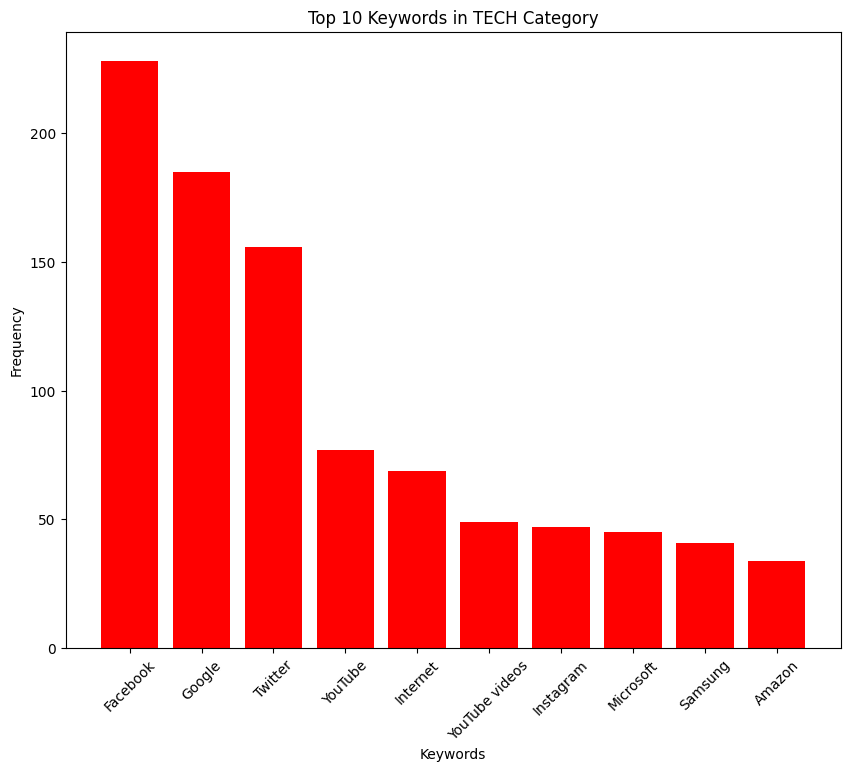

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from transformers import pipeline
# Load the keyword extraction model
model = pipeline("token-classification", model="yanekyuk/bert-keyword-extractor", aggregation_strategy="simple")

# Function to extract keywords using the BERT model
def extract_keywords(text):
    results = model(text)
    return [result['word'] for result in results]

# Filter rows where category is 'TECH'
tech_texts = data[data['category'] == 'TECH']['cleaned_text']

# Extract keywords from each TECH text
all_keywords = []
for text in tech_texts:
    keywords = extract_keywords(text)
    all_keywords.extend(keywords)

# Count the frequency of each keyword
keyword_counts = Counter(all_keywords)

# Get the top 10 keywords
top_keywords = keyword_counts.most_common(10)

# Plotting the top 10 keywords
keywords, counts = zip(*top_keywords)
plt.figure(figsize=(10, 8))
plt.bar(keywords, counts, color='red')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Top 10 Keywords in TECH Category')
plt.xticks(rotation=45)
plt.show()

# Tech bert model

In [3]:
from transformers import pipeline
#https://huggingface.co/ilsilfverskiold/tech-keywords-extractor
# Load the model
model = pipeline("text2text-generation", model="ilsilfverskiold/tech-keywords-extractor")
# Example text
text = "Spin 2.0 – open-source tool for building and running WebAssembly applications -"

# Generate keywords
result = model(text)
# Extract the 'generated_text' from the first dictionary in the list
keywords = result[0]['generated_text']

print(keywords)

generation_config.json:   0%|          | 0.00/292 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


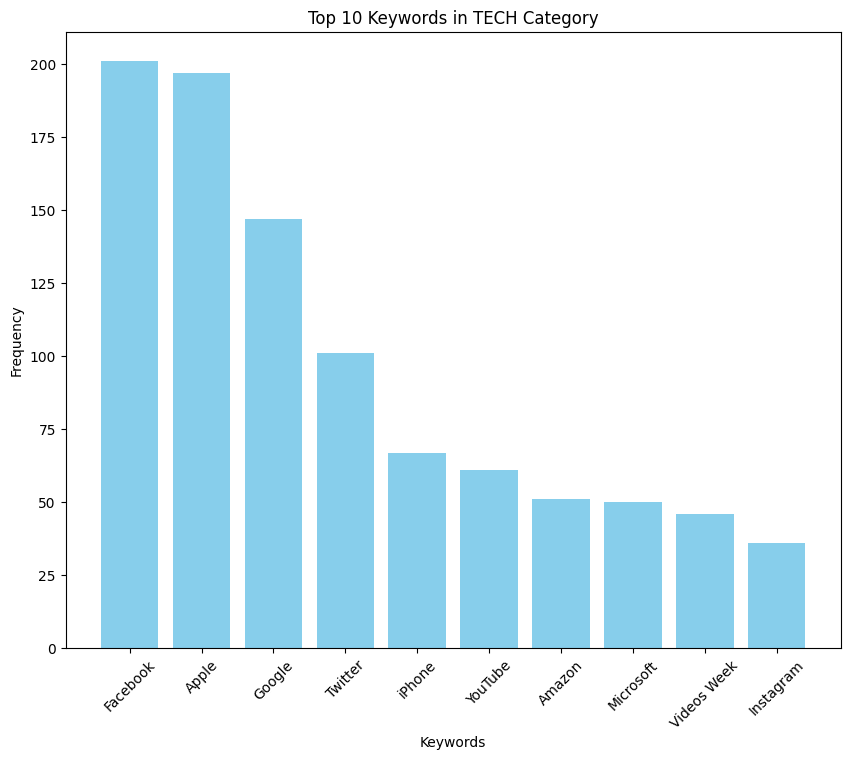

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from transformers import pipeline

# Load the keyword extraction model
model = pipeline("text2text-generation", model="ilsilfverskiold/tech-keywords-extractor")

# Function to extract keywords using the model
def extract_keywords(text):
    result = model(text)
    return result[0]['generated_text']

# Filter rows where category is 'TECH'
tech_texts = data[data['category'] == 'TECH']['cleaned_text']

# Extract keywords from each TECH text
all_keywords = []
for text in tech_texts:
    keywords = extract_keywords(text)
    # Split keywords into a list if they are returned as a single string
    all_keywords.extend(keywords.split(", "))

# Count the frequency of each keyword
keyword_counts = Counter(all_keywords)

# Get the top 10 keywords
top_keywords = keyword_counts.most_common(10)

# Plotting the top 10 keywords
keywords, counts = zip(*top_keywords)
plt.figure(figsize=(10, 8))
plt.bar(keywords, counts, color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Top 10 Keywords in TECH Category')
plt.xticks(rotation=45)
plt.show()